# <span style="color:darkblue"> Lecture 20: Text Analysis </span>

<font size = "5">

Intro text analysis

https://www.youtube.com/watch?v=IRKDrrzh4dE

# <span style="color:darkblue"> I. Setup Working Environment </span>

In [2]:
pip install faiss

ERROR: Could not find a version that satisfies the requirement faiss (from versions: none)
ERROR: No matching distribution found for faiss
Note: you may need to restart the kernel to use updated packages.


In [4]:

# Import SK-Learn library for machine learning functions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS 
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split



# Import standard data analysis packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Kmenas
from sklearn.cluster import MiniBatchKMeans

#import faiss




# <span style="color:darkblue"> II. Data </span>

<font size = "5">

We will analyze a dataset on Amazon Reviews

https://www.kaggle.com/datasets/yasserh/amazon-product-reviews-dataset/data


In [5]:
data = pd.read_csv("data_raw/amazon_reviews.csv")

len(data)


1597

<font size = "5">

Check features

In [6]:
data.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')

<font size = "5">

Check text

In [7]:
reviews = data["reviews.text"]

<font size = "5">

Check rating

(array([ 42.,   0.,  34.,   0.,   0., 124.,   0., 236.,   0., 741.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

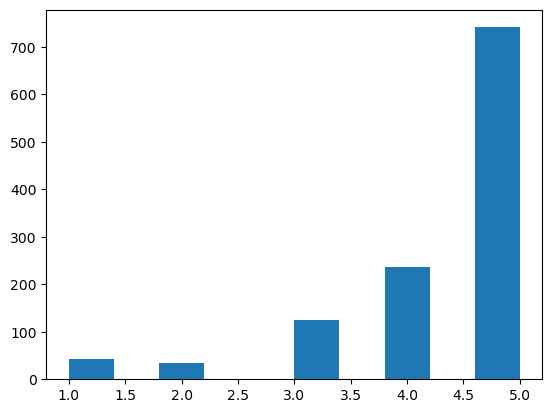

In [8]:
plt.hist(x = data["reviews.rating"])


<font size = "5">

Filter non-missing ratings data

- 26% missing data!
- Could generate selection bias in reviews

In [9]:
# Check for missing values
# A lot of reviews are missing review data
missing_values = data["reviews.rating"].isnull().sum()
percent_missing = missing_values /len(data)
print(percent_missing)

# Extract non-missing data
data_nonmissing = data[data["reviews.rating"].notnull()]

0.2629931120851597


# <span style="color:darkblue"> III. Bag of Words </span>


<font size = "5">

Stop words

- Commonly used words
- Available for different languages



In [10]:
# First ten English stop words
list(ENGLISH_STOP_WORDS)[0:10]

['at',
 'name',
 'their',
 'them',
 'indeed',
 'take',
 'none',
 'thence',
 'hence',
 'ten']

<font size = "5">

Create custom stop words

In [12]:
# Here we added Python to the list of stop words
custom_stop_words = list(ENGLISH_STOP_WORDS) + ["Python"]
custom_stop_words
# You can also create your own list
# custom_stop_words = ["and","or","how"]


['at',
 'name',
 'their',
 'them',
 'indeed',
 'take',
 'none',
 'thence',
 'hence',
 'ten',
 'elsewhere',
 'those',
 'with',
 'amoungst',
 'hundred',
 'every',
 'mine',
 'whom',
 'see',
 'you',
 'made',
 'empty',
 'sometimes',
 'whatever',
 'whither',
 'ever',
 'is',
 'into',
 'nowhere',
 'upon',
 'against',
 'six',
 'from',
 'inc',
 'her',
 'each',
 'nevertheless',
 'are',
 'everything',
 'though',
 'anywhere',
 'he',
 'most',
 'fifteen',
 'serious',
 'sincere',
 'yourselves',
 'which',
 'than',
 'its',
 'last',
 'noone',
 'how',
 'fill',
 'first',
 'becoming',
 'therein',
 'had',
 'out',
 'also',
 'seemed',
 'as',
 'through',
 'too',
 'twelve',
 'on',
 'latter',
 'ie',
 'an',
 'do',
 'put',
 'whoever',
 'were',
 'interest',
 'that',
 'thick',
 'myself',
 'should',
 'both',
 'con',
 'might',
 'whether',
 'either',
 'detail',
 'himself',
 'has',
 'without',
 'two',
 'because',
 'my',
 'neither',
 'who',
 'co',
 'by',
 'own',
 'although',
 'else',
 'can',
 'been',
 'system',
 'un',
 'o

<font size = "5">

Count vectorizer

- Check for distinct words across all reviews
- Remove any stop words
- ```min_df``` is used to filter out words depending <br>
on how often they occur. For example, ```min_df=3``` <br>
only keeps words if they are mentioned at least 3 times

In [13]:
word_model = CountVectorizer(min_df=1,
                       stop_words=custom_stop_words)
word_model.fit(reviews)

/Users/aolyu/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['python'] not in stop_words.
  warnings.warn(


CountVectorizer(stop_words=['at', 'name', 'their', 'them', 'indeed', 'take',
                            'none', 'thence', 'hence', 'ten', 'elsewhere',
                            'those', 'with', 'amoungst', 'hundred', 'every',
                            'mine', 'whom', 'see', 'you', 'made', 'empty',
                            'sometimes', 'whatever', 'whither', 'ever', 'is',
                            'into', 'nowhere', 'upon', ...])

<font size = "5">

Check Vocabulary

- Check in VS-Code Data Viewer
- You can use preliminary findings to decide whether <br>
to add more stop words

In [14]:
# Extract words in vocabulary and frequency
vocabulary = word_model.vocabulary_

# Convert to dataframew
frequency_words  = pd.DataFrame(vocabulary.items(),
                                columns=['Word', 'Frequency'])
                                
# Display sorted dataset                                
frequency_words.sort_values(by = "Frequency",ascending=False)

,Word,Frequency
4309,zumi,6194
4474,zooming,6193
4856,zoom,6192
5496,zombies,6191
2692,zippy,6190
...,...,...
1449,07,4
3398,04,3
484,000s,2
494,000,1


<font size = "5">

Create a dataset counting which words are used <br>
per review

- Each row is a different review
- Each column is a ${0,1}$ indicator on whether that <br>
word was mentioned
- Huge matrix!!

In [36]:
# Create X matrix
X = word_model.transform(reviews)

# Check dimension of X matrix
np.shape(X)

# Let's take a look at the first 5 rows and 100 columns
Xtilde = X[0:5,0:100].todense()



# Append review column to Xtilde
Xtilde = np.append(Xtilde,data[0:5,"reviews.text"],axis=1)

#Xtilde = np.append(Xtilde,data[0:5,"reviews.text"],axis=1)




InvalidIndexError: (slice(0, 5, None), 'reviews.text')

<font size = "5">

Try it yourself!

Create a bag of words for the column "review.title".

- What are the most common words?



In [21]:
# Write your own code

# Delete NA values for review.title
data_nonmissing = data_nonmissing[data_nonmissing["reviews.title"].notnull()]

# Extract reviews.title
reviews_title = data_nonmissing["reviews.title"]

# Create a count vectorizer
word_model_title = CountVectorizer(min_df=1,
                       stop_words=custom_stop_words)
word_model_title.fit(reviews_title)

# Extract words in vocabulary and frequency
vocabulary_title = word_model_title.vocabulary_

# Convert to dataframew
frequency_words_title  = pd.DataFrame(vocabulary_title.items(),
                                columns=['Word', 'Frequency'])

# Display sorted dataset
frequency_words_title.sort_values(by = "Frequency",ascending=False)





/Users/aolyu/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['python'] not in stop_words.
  warnings.warn(


,Word,Frequency
853,zero,983
528,young,982
40,yes,981
245,yeehaw,980
215,years,979
...,...,...
53,11,4
200,10,3
86,065,2
79,064,1


In [22]:
# Create X matrix
X_title = word_model_title.transform(reviews_title)

# Check dimension of X matrix
np.shape(X_title)

(1177, 984)

# <span style="color:darkblue"> IV. Sentiment Analysis </span>

<font size = "5">
Sentiment analsys uses words to predict user ratings. <br>


- In this case we have ratings labels
- We'll use the data with nonmissing labels


In [23]:
# Write your own code

text = data_nonmissing["reviews.text"]
y    = data_nonmissing["reviews.rating"]

text_train, text_test, y_train, y_test = train_test_split(text, y,
                                                    random_state=0)

<font size = "5">

Extract vectorized X

In [27]:
# Create X matrix
word_model_train = CountVectorizer(min_df=1,
                       stop_words=custom_stop_words)
word_model_train.fit(text_train)
X_train = word_model.transform(text_train)

# Check dimension of X matrix
np.shape(X_train)

/Users/aolyu/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['python'] not in stop_words.
  warnings.warn(


(882, 6195)

<font size = "5">

We can compress the data using <br>
truncated singular value decomposition (SVD)

- This is an alternative to PCA that is better suited <br>
for sparse, binary data like text

In [28]:
svd = TruncatedSVD(n_components=3,random_state=42);
svd.fit(X_train)
X_svd_train = svd.transform(X_train)
np.shape(X_svd_train)

(882, 3)

[Text(0.5, 0, 'First Principal Component'),
 Text(0, 0.5, 'Second Principal Component')]

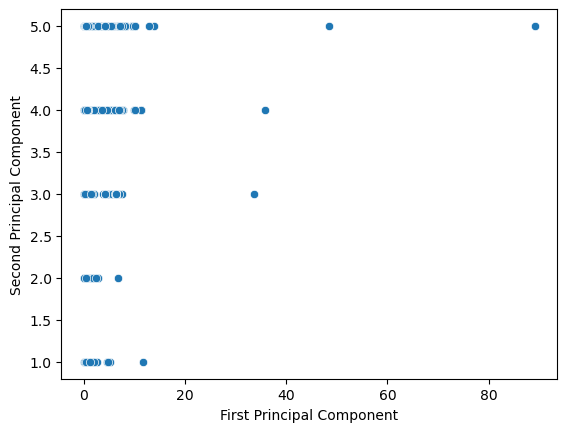

In [26]:
# Hue is used to color
ax = sns.scatterplot(x = X_svd_train[:,0],
                     y = y_train)
ax.set(xlabel='First Principal Component',
       ylabel='Second Principal Component')


<font size = "5">

Try it yourself!

Create a machine learning pipeline

- Run a support vector machine regression to predict user ratings
- What is the out-of-sample performance on the test data?
- Use your data to predict reviews that were missing
- How does the distribution of missing to non-missing reviews compare?



In [40]:
# Write your own code

# run a support vector machine regression to predict the rating
# from sklearn.svm import SVR
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

# Create a support vector machine regression model
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

# Fit the model
regr.fit(X_svd_train, y_train)




Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [41]:
# Out of sample prediction
X_test = word_model.transform(text_test)
X_svd_test = svd.transform(X_test)
y_pred = regr.predict(X_svd_test)

# Calculate the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


1.1384516734315595

In [43]:
# Predict missing value of reviews.rating
data_missing = data[data["reviews.rating"].isnull()]
text_missing = data_missing["reviews.text"]
X_missing = word_model.transform(text_missing)
X_svd_missing = svd.transform(X_missing)
y_missing = regr.predict(X_svd_missing)

# display the predicted ratings
y_missing

array([4.79611155, 4.83629737, 4.79933695, 4.80017407, 4.79811622,
       4.80132846, 4.80100665, 4.79811622, 4.78737063, 4.78004597,
       4.84250369, 4.77906993, 4.84441692, 4.77906993, 4.84250369,
       4.84250369, 4.84250369, 4.77906993, 4.78737063, 4.77906993,
       4.78737063, 4.84250369, 4.84441692, 4.79341308, 4.79800906,
       4.77675947, 4.79999911, 4.77387516, 4.80064767, 4.80252888,
       4.80060611, 4.79703126, 4.800805  , 4.79982017, 4.69285988,
       4.72784051, 4.40596271, 4.72784051, 4.72784051, 4.40596271,
       4.80019419, 4.80019419, 4.69285988, 4.80019419, 4.72784051,
       4.80019419, 4.40596271, 4.40596271, 4.72784051, 4.72784051,
       4.72784051, 4.69285988, 4.40596271, 4.80019419, 4.80019419,
       4.69285988, 4.72784051, 4.69285988, 4.80019419, 4.66934152,
       4.70668776, 3.98512624, 3.98512624, 4.63548415, 3.98512624,
       4.78742315, 4.78742315, 4.78742315, 3.98512624, 4.63548415,
       4.78742315, 3.98512624, 4.78742315, 4.63548415, 3.98512

In [47]:
# Mean of the predicted ratings with the mean of the previous ratings
print(np.mean(y_missing))
print(np.mean(data["reviews.rating"]))

# 

4.655350434420518
4.3593882752761255


In [44]:
# proportion of missing and non-missing values
len(data_missing)/len(data)


0.2629931120851597

<font size = "5">

Try it yourself!

- What happens if you change the minimum frequency of words <br>
and/or change the number of components?

In [45]:
# Write your own code

# change the minimum frequency to 10
word_model = CountVectorizer(min_df=10,
                       stop_words=custom_stop_words)
word_model.fit(reviews)

# Extract words in vocabulary and frequency
vocabulary = word_model.vocabulary_

# Convert to dataframew
frequency_words  = pd.DataFrame(vocabulary.items(),
                                columns=['Word', 'Frequency'])

# Display sorted dataset
frequency_words.sort_values(by = "Frequency",ascending=False)



/Users/aolyu/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['python'] not in stop_words.
  warnings.warn(


,Word,Frequency
1019,youtube,1513
449,yes,1512
95,years,1511
282,year,1510
1327,xbox,1509
...,...,...
844,11,4
1004,1080p,3
927,100,2
634,10,1
